In [1]:
!pip install venn

  Preparing metadata (setup.py) ... done
  Created wheel for venn: filename=venn-0.1.3-py3-none-any.whl size=19702 sha256=5dc100e089280a4cf7e6a9c7fef0efe37fc03b05ce94517ed240031af2252420
  Stored in directory: /root/.cache/pip/wheels/b8/2a/b1/a1ff9ba87eb919daed348de8c17b00024dfef34b35e7002e6c
Successfully built venn


In [28]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from matplotlib_venn import venn3, venn2
from venn import venn
from google.colab import files

In [3]:
uploaded = files.upload()

Saving 10_MCC.csv to 10_MCC.csv
Saving 20_MCC.csv to 20_MCC.csv
Saving 40_MCC.csv to 40_MCC.csv
Saving 40_MNC.csv to 40_MNC.csv
Saving 20_MNC.csv to 20_MNC.csv
Saving 10_MNC.csv to 10_MNC.csv
Saving 10_Closeness.csv to 10_Closeness.csv
Saving 20_Closeness.csv to 20_Closeness.csv
Saving 40_Closeness.csv to 40_Closeness.csv


In [ ]:
uploaded = files.upload()

Saving Closeness_30.csv to Closeness_30.csv


In [4]:
mcc_df_10=  pd.read_csv("10_MCC.csv")
mcc_df_10 = mcc_df_10.replace("CAVIN1", "PTRF")

mnc_df_10 = pd.read_csv("10_MNC.csv")
mnc_df_10 = mnc_df_10.replace("CAVIN1", "PTRF")

closeness_df_10 = pd.read_csv("10_Closeness.csv")
closeness_df_10 = closeness_df_10.replace("CAVIN1", "PTRF")

In [6]:
mcc_df_20=  pd.read_csv("20_MCC.csv")
mcc_df_20 = mcc_df_20.replace("CAVIN1", "PTRF")

mnc_df_20 = pd.read_csv("20_MNC.csv")
mnc_df_20 = mnc_df_20.replace("CAVIN1", "PTRF")

closeness_df_20 = pd.read_csv("20_Closeness.csv")
closeness_df_20 = closeness_df_20.replace("CAVIN1", "PTRF")

In [7]:
mcc_df_40=  pd.read_csv("40_MCC.csv")
mcc_df_40 = mcc_df_40.replace("CAVIN1", "PTRF")

mnc_df_40 = pd.read_csv("40_MNC.csv")
mnc_df_40 = mnc_df_40.replace("CAVIN1", "PTRF")

closeness_df_40 = pd.read_csv("40_Closeness.csv")
closeness_df_40 = closeness_df_40.replace("CAVIN1", "PTRF")

In [8]:
mcc_df_10

,Rank,Name,Score
0,1,FLNA,19296
1,2,ACTN1,17466
2,3,TGFB1I1,16650
3,4,TNS1,15170
4,5,RHOB,12963
5,6,PTRF,10340
6,7,EHD2,8395
7,8,TIMP2,7274
8,9,RHOQ,6734
9,10,ILK,5976


In [9]:
mnc_df_20

,Rank,Name,Score
0,1,FLNA,39
1,2,RHOB,31
2,3,TNS1,24
3,3,DPYSL3,24
4,5,ACTN1,23
5,6,TGFB1I1,22
6,6,PRNP,22
7,6,PTRF,22
8,6,RHOQ,22
9,10,SPARCL1,21


In [10]:
closeness_df_40

,Rank,Name,Score
0,1,FLNA,61.500000
1,2,RHOB,56.666667
2,3,TNS1,53.166667
3,4,DPYSL3,52.500000
4,5,PRNP,52.166667
5,6,ACTN1,52.000000
6,7,RHOQ,51.500000
7,8,TGFB1I1,51.333333
8,9,PTRF,51.166667
9,10,SPARCL1,50.666667


In [11]:
mnc_df_10.columns

Index(['Rank', 'Name', 'Score'], dtype='object')

In [12]:
set1_10 = set(mcc_df_10["Name"])
set2_10 = set(mnc_df_10["Name"])
set3_10 = set(closeness_df_10["Name"])

In [13]:
set1_20 = set(mcc_df_20["Name"])
set2_20 = set(mnc_df_20["Name"])
set3_20 = set(closeness_df_20["Name"])

In [14]:
set1_40 = set(mcc_df_40["Name"])
set2_40 = set(mnc_df_40["Name"])
set3_40 = set(closeness_df_40["Name"])

In [17]:
common_genes_10 = set1_10 & set2_10 & set3_10
print("Top 10 Genes, Common Hub Genes are:", common_genes_10)
print(len(common_genes_10))

common_genes_20 = set1_20 & set2_20 & set3_20
print("Top 20 Genes, Common Hub Genes are:", common_genes_20)
print(len(common_genes_20))

common_genes_40 = set1_40 & set2_40 & set3_40
print("Top 40 Genes, Common Hub Genes are:", common_genes_40)
print(len(common_genes_40))

Top 10 Genes, Common Hub Genes are: {'PTRF', 'FLNA', 'RHOB', 'TNS1', 'ACTN1', 'TGFB1I1', 'RHOQ'}
7
Top 20 Genes, Common Hub Genes are: {'PTRF', 'PRNP', 'FLNA', 'SPARCL1', 'RHOB', 'PALLD', 'SNCA', 'CSRP1', 'TNS1', 'DPYSL3', 'TIMP2', 'MEF2C', 'ILK', 'ACTN1', 'TGFB1I1', 'RHOQ', 'CAV2'}
17
Top 40 Genes, Common Hub Genes are: {'PRNP', 'EHD2', 'GABARAPL1', 'CORO1C', 'DPT', 'SNCA', 'TMEM47', 'LAMB2', 'TIMP2', 'JAM3', 'MEF2C', 'FNBP1', 'RHOB', 'PRKD1', 'FLNA', 'TGFB1I1', 'RHOQ', 'CAV2', 'PPP3CB', 'PTRF', 'ITPR1', 'PALLD', 'CSRP1', 'TNS1', 'ILK', 'ACTN1', 'SPARCL1', 'RASL12', 'DPYSL3', 'TUBB', 'SLIT2', 'EMILIN1'}
32


In [47]:
sets_10 = {
    "MCC": set1_10,
    "MNC": set2_10,
    "Closeness": set3_10
}


sets_20 = {
    "MCC": set1_20,
    "MNC": set2_20,
    "Closeness": set3_20
}

sets_40 = {
    "MCC": set1_40,
    "MNC": set2_40,
    "Closeness": set3_40
}

Plot Venn diagram

<Figure size 1000x700 with 0 Axes>

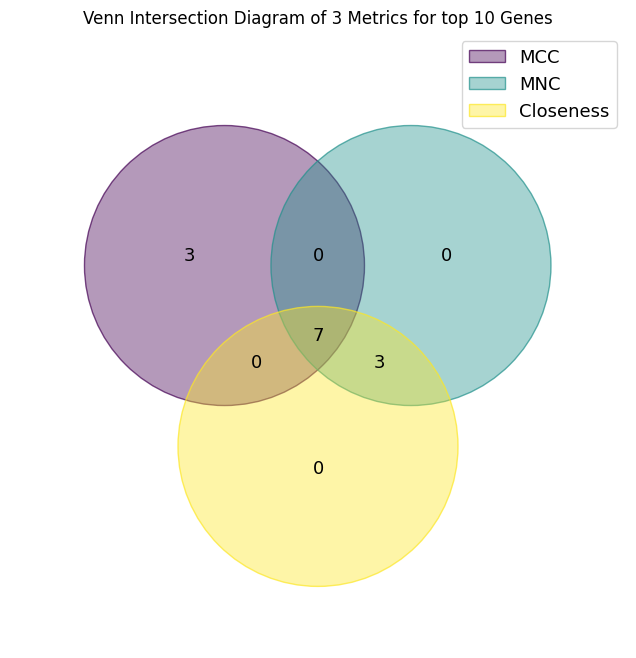

<Figure size 1000x700 with 0 Axes>

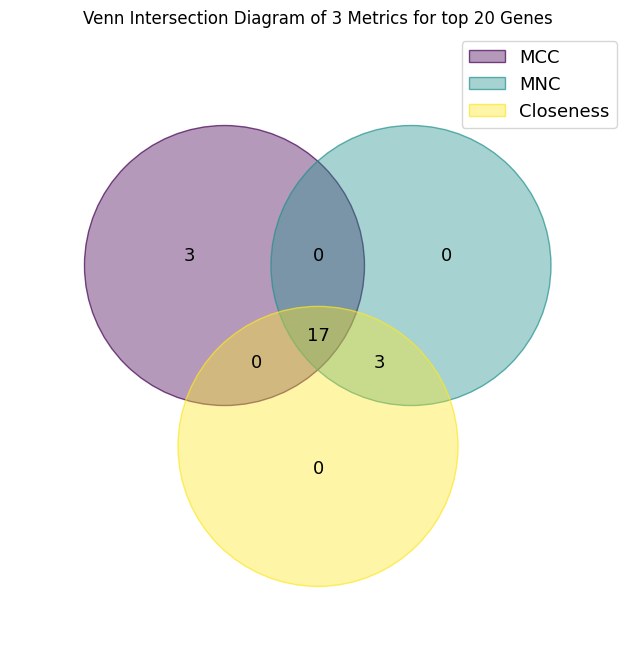

<Figure size 1000x700 with 0 Axes>

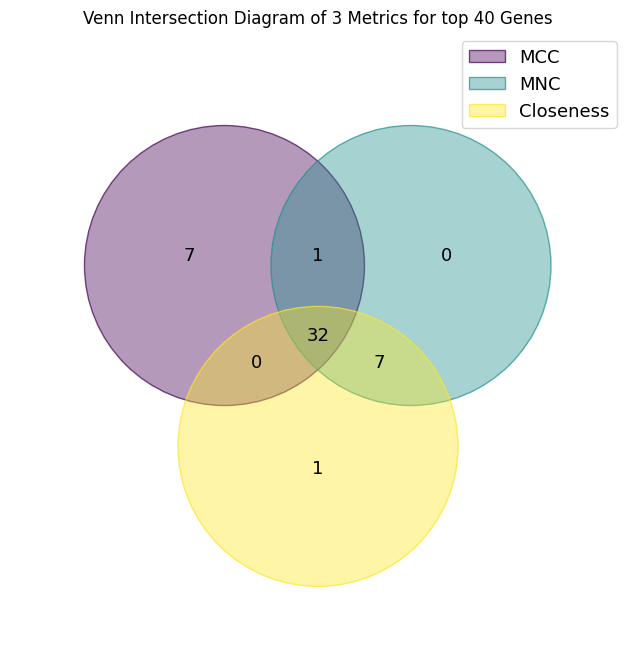

In [48]:
plt.figure(figsize=(10, 7))
venn(sets_10)
plt.title("Venn Intersection Diagram of 3 Metrics for top 10 Genes")
plt.savefig("venn_diagram_10.png", dpi=300, bbox_inches="tight")
plt.savefig("venn_diagram_10.pdf", bbox_inches="tight")
plt.show()




plt.figure(figsize=(10, 7))
venn(sets_20)
plt.title("Venn Intersection Diagram of 3 Metrics for top 20 Genes")
plt.savefig("venn_diagram_20.png", dpi=300, bbox_inches="tight")
plt.savefig("venn_diagram_20.pdf", bbox_inches="tight")
plt.show()


plt.figure(figsize=(10, 7))
venn(sets_40)
plt.title("Venn Intersection Diagram of 3 Metrics for top 40 Genes")
plt.savefig("venn_diagram_40.png", dpi=300, bbox_inches="tight")
plt.savefig("venn_diagram_40.pdf", bbox_inches="tight")
plt.show()

In [49]:
files.download("venn_diagram_10.png")
files.download("venn_diagram_20.png")
files.download("venn_diagram_40.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#df_common = pd.DataFrame(list(common_genes_10), columns=["Hub_Gene"])

In [ ]:
#df_common.shape

(24, 1)

In [ ]:
#df_common

,Hub_Gene
0,PRNP
1,FLNA
2,SNCA
3,ACTN1
4,PALLD
5,PPP3CB
6,TNS1
7,RHOB
8,EHD2
9,SLIT2


In [ ]:
#df_common.to_csv("hub_gene_for_ml_train.csv", index=False)

print("Converted file saved as 'hub_gene_for_ml_train.csv'")

Converted file saved as 'hub_gene_for_ml_train.csv'


In [ ]:
#files.download("hub_gene_for_ml_train.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>